In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import random
from scipy.integrate import odeint


4/19/16

$x' = \sin(y)$

$y' = x - x^{3}$
    

In [69]:
def Jacobean(X):
    J =np.array([[0, np.cos(X[1])],
                 [1- 3*X[0]**2, 0]])
    return J


What are the null clines?
$x' = 0$ at $y=0$; and $y = n\pi$

While $y' = 0 $ at $x = 0$, and $x = \pm 1$


Giving us fixed points at : (0,0), (1,0), (-1, 0) and an infinte number at ([-1,0,1], n pi)

To determine stability, we can look at the Jacobean at each point

In [89]:
for P in [(0,0), (-1,0), (1, 0), (0,np.pi), (-1,np.pi), (1, np.pi)]:
    J = Jacobean(P)
    e1, e2 = np.linalg.eig(J)[0]
    
    if e1.real == 0 and e2.real == 0:
        print('The fixed point at {} is a stable orbit'.format(P))
    elif e1.imag == 0 and e2.imag == 0:
        if e1 < 0 and e2 < 0:
            print('The fixed point at {} is a sink'.format(P))
        elif e1 < 0 or e2 < 0:
            print('The fixed point at {} is a saddle'.format(P))
        elif e1 > 0 and e2 > 0:
            print('The fixed point at {} is a source'.format(P))
    else:
        if e1.real < 0 and e2.real < 0:
            print('The fixed point at {} is an attractor'.format(P))
        elif e1 < 0 or e2 < 0:
            print('The fixed point at {} is a saddle'.format(P))
        elif e1.real > 0 and e2.real > 0:
            print('The fixed point at {} is repeller'.format(P))

The fixed point at (0, 0) is a saddle
The fixed point at (-1, 0) is a stable orbit
The fixed point at (1, 0) is a stable orbit
The fixed point at (0, 3.141592653589793) is a stable orbit
The fixed point at (-1, 3.141592653589793) is a saddle
The fixed point at (1, 3.141592653589793) is a saddle


Finally, we can plot some vectors around these fixed points

(-4, 4)

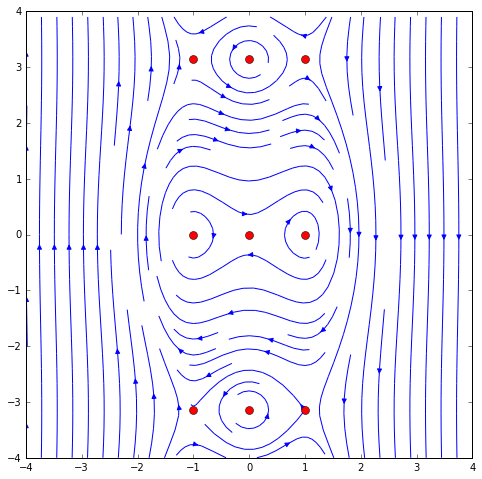

In [81]:
x,y = np.meshgrid(np.arange(-4,4,0.1), np.arange(-4,4,0.1))
U = np.sin(y)
V = x - x**3
plt.figure(figsize=(8,8))
plt.streamplot(x,y,U,V)
#And the fixed points
plt.plot([-1,0,1,-1,0,1, -1,0,1], [0,0,0,np.pi, np.pi, np.pi,-np.pi, -np.pi, -np.pi], 'ro', markersize=8)
plt.xlim(-4,4)
plt.ylim(-4,4)

In [82]:
def XPrime(X, *args):
    xp = np.sin(X[1])
    yp = X[0] - X[0]**3
    return ((xp,yp))

(-4, 4)

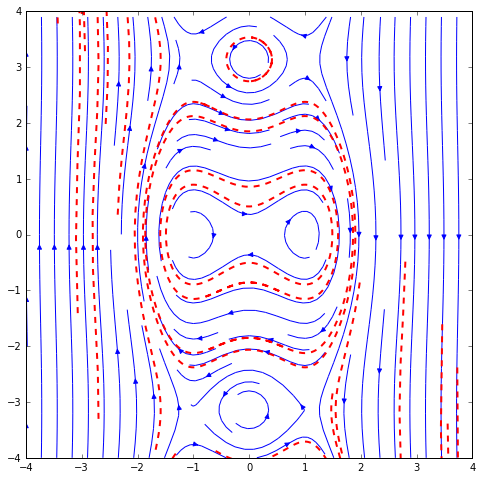

In [91]:
import random
#Some random trajectories
t = np.linspace(0,10,200)
plt.figure(figsize=(8,8))
plt.streamplot(x,y,U,V)
for i in range(20):
    X_0 = np.array([random.uniform(-4,4),random.uniform(-4,4)])
    soln = odeint(XPrime,X_0,t)
    plt.plot(soln[:,0],soln[:,1], 'r--', linewidth=2)
plt.xlim(-4,4)
plt.ylim(-4,4)